<a href="https://colab.research.google.com/github/ritamiitism/LearningML/blob/main/zerodetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,flatten
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.get_logger().setLevel('ERROR')


In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize images (0–255 → 0–1)
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

print(X_train.shape, y_train.shape)
#print(y_train_binary[0]);


(60000, 784) (60000,)


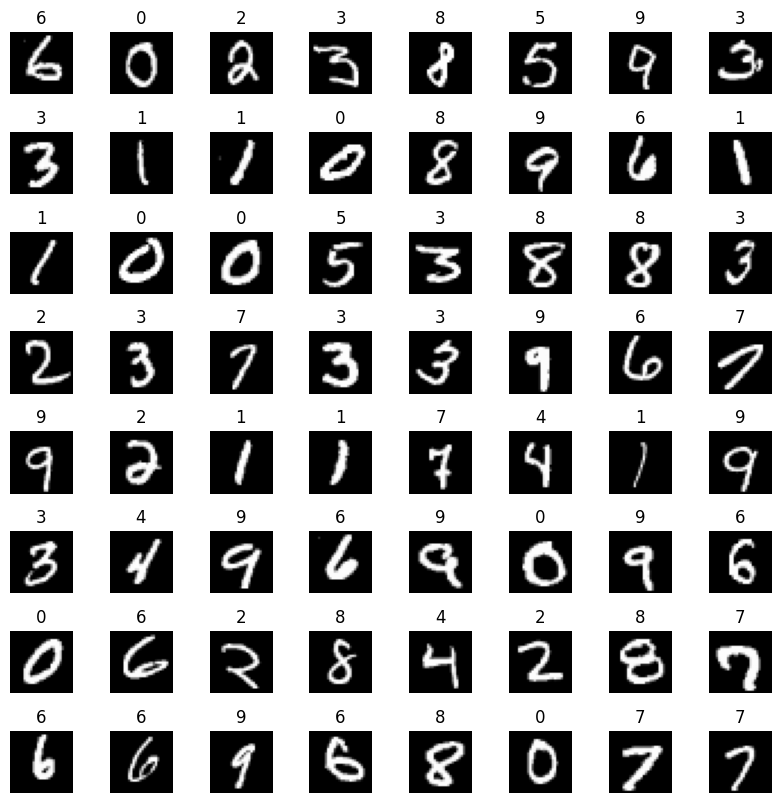

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load MNIST
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten MNIST images
y=y_train
# labels
X = X_train.reshape(X_train.shape[0], -1)

m, n = X.shape    # (60000, 784)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(0, m)
    # reshape image back to 28x28
    img = X[random_index].reshape(28, 28)

    ax.imshow(img, cmap='gray')

    ax.set_title(str(y[random_index]))
    ax.set_axis_off()


In [20]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(784,activation="relu"),
        Dense(512,activation="relu"),
        Dense(256,activation="relu"),
        Dense(128,activation="relu"),
        Dense(64,activation="relu"),
        Dense(32,activation="relu"),
        Dense(10,activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192,250 (4.55 MB)

 Trainable params: 1,192,250 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(0.001),)
model.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - loss: 1.7788
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 0.1828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.1243
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 0.1036
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 0.0932
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0768
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0629
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - loss: 0.0672
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 0.0549
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0600


10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━

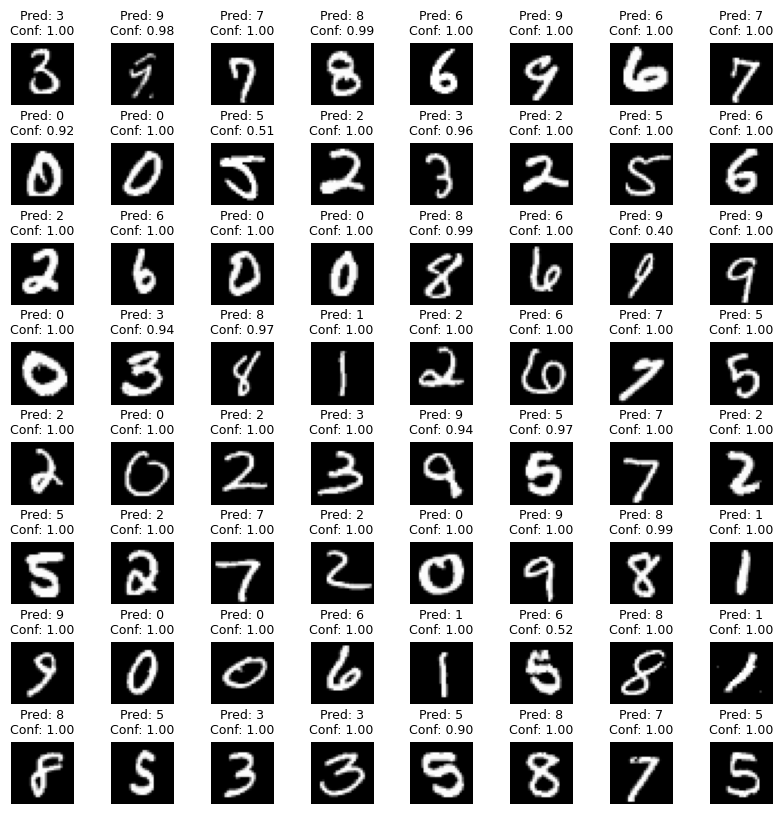

In [46]:
# Doing with mnist testcases
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)
m,n,p=X_test.shape;
print(m)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(0, m)
    # reshape image back to 28x28
    img = X_test[random_index].reshape(28, 28)
    predict=model.predict(img.reshape(1,784))
    prediction=np.argmax(predict)
    confidence=np.max(predict)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {prediction}\nConf: {confidence:.2f}", fontsize=9)

    ax.set_axis_off();



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Predicted digit: 8
Confidence: 0.18652283


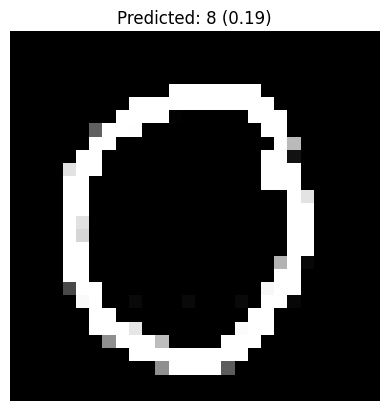

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 8
Confidence: 0.19830751


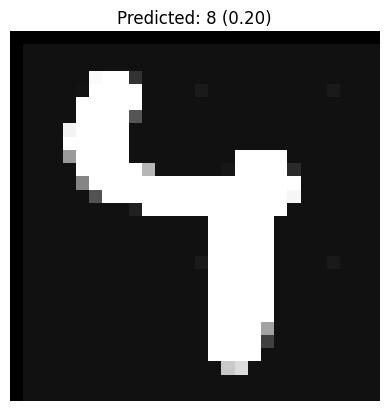

In [47]:
# -----------------------------
# IMPORTS
#not good ouput with real value results without CNN
# -----------------------------
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage
from google.colab import drive
drive.mount('/content/drive')


# -----------------------------
# LOAD IMAGES
# -----------------------------
path1 = "/content/drive/MyDrive/digits/zero2.png"
path2 = "/content/drive/MyDrive/digits/nonz.png"

img1 = Image.open(path1).convert("L").resize((28, 28), Image.NEAREST)
img2 = Image.open(path2).convert("L").resize((28, 28), Image.NEAREST)


# -----------------------------
# STACK IMAGES (BATCH)
# -----------------------------
arr = np.stack([
    np.array(img1),
    np.array(img2)
], axis=0)   # shape → (2, 28, 28)


# -----------------------------
# PREPROCESS + PREDICT (PER IMAGE)
# -----------------------------
for img in arr:

    # Normalize
    img = img.astype(np.float32) / 255.0

    # Center digit
    cy, cx = scipy.ndimage.center_of_mass(img > 0.1)
    if not np.isnan(cx):
        shift_x = int(14 - cx)
        shift_y = int(14 - cy)
        img = scipy.ndimage.shift(
            img,
            shift=[shift_y, shift_x],
            mode='constant',
            cval=0
        )

    # -----------------------------
    # PREDICT
    # -----------------------------
    prediction = model.predict(img.reshape(1, 784))

    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)

    print("Predicted digit:", predicted_digit)
    print("Confidence:", confidence)

    # -----------------------------
    # VISUAL CHECK
    # -----------------------------
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_digit} ({confidence:.2f})")
    plt.axis('off')
    plt.show()
